Съемка точек C,D,E производится с двух стоянок: A и B.  
В результате съемки со стоянки A, измеряются расстояния AC, AD, AE и углы между линиями в направлении точек.  
В результате съемки со стоянки B измеряются расстояние BC, BE, BD и углы $\alpha$ и $\beta$  

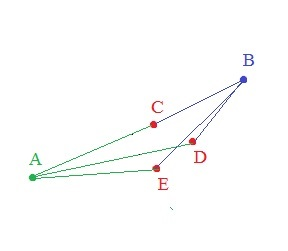

In [1]:
from IPython.core.display import Image
Image(filename=('images/1.jpg'))

Рассмотрим измерения, произведенные со стоянки A в произвольной системе координат с начало отсчета в точке A, и осью абсцисс, совпадающей с отрезком AE.

Нам известно значение углов alpha и beta, длины отрезков AC, AD, AE.  
Этой информации достаточно, чтобы вычислить значение координат точек C,D и E по формулам:  
Cx = AC*cos(alpha+beta)   
Cy = AC*sin(alpha+beta)    
Dx = AD*cos(beta)    
Dy = AD*sin(beta)  
Ex = AE*cos(0)  
Ey = AE*sin(0)  

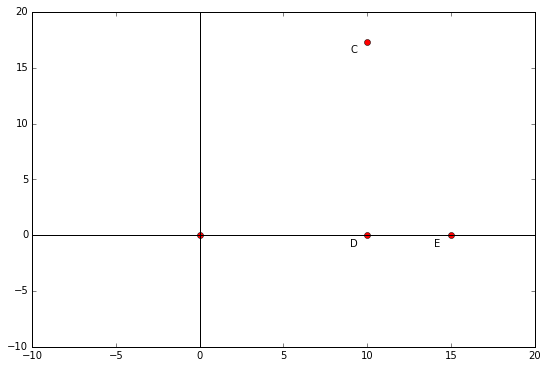

In [113]:
#Image(filename=('images/2.jpg'))
         
import matplotlib.pyplot as plt
%matplotlib inline

fig_size = [9,6]
plt.rcParams["figure.figsize"] = fig_size

from math import cos, sin, acos, sqrt

alpha = 1.0472
beta = 0
AE = 15
AD = 10
AC = 20

Cx = AC*cos(alpha+beta)
Cy = AC*sin(alpha+beta)
Dx = AD*cos(beta)
Dy = AD*sin(beta)
Ex = AE
Ey = 0

def npl(Cx,Cy,Dx,Dy,Ex,Ey,lt='CDE'):
    plt.plot([0,Cx,Dx,Ex],[0,Cy,Dy,Ey],'ro')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.axis([-10, 20, -10, 20])
    #plt.annotate('A', xy=(0, 0),xytext=(-1,-1))
    plt.annotate(lt[0], xy=(Cx, Cy),xytext=(Cx-1,Cy-1))
    plt.annotate(lt[1], xy=(Dx, Dy),xytext=(Dx-1,Dy-1))
    plt.annotate(lt[2], xy=(Ex, Ey),xytext=(Ex-1,Ey-1))
    return plt.show()

npl(Cx,Cy,Dx,Dy,Ex,Ey)


Аналогичным образом вычислим значения координат точек, измеренных со стоянки B.

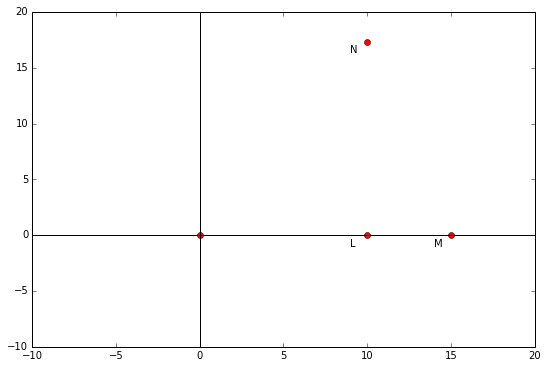

In [114]:
alpha = 1.0472
beta = 0
BM = 15
BL = 10
BN = 20

Nx = BN*cos(alpha+beta)
Ny = BN*sin(alpha+beta)
Lx = BL*cos(beta)
Ly = BL*sin(beta)
Mx = BM
My = 0

npl(Nx,Ny,Lx,Ly,Mx,My,'NLM')

Вычисляем длину сторон и значение угла NML:

In [115]:
ML = sqrt((Lx - Mx)**2 + (Ly-My)**2)
MN = sqrt((Nx - Mx)**2 + (Ny-My)**2)
NL = sqrt((Nx - Lx)**2 + (Ny-Ly)**2)
#a_NML = acos((MN**2+NL**2-ML**2)/(2*MN*NL))
a_NLM = acos((NL**2+ML**2-MN**2)/(2*ML*MN))
print(ML,MN,NL)
print(a_NLM)

5.0 18.027791668323456 17.320532563722793
1.5707986795261617


Переносим треугольник MNL в систему координат угла CDE, таким образом, чтобы точка L совпадала с начало системы координат(0,0), а точка M лежала на оси абсцисс, т.е. угол LMx = 0

Определяем координаты треугольника MNL в новой системе координат

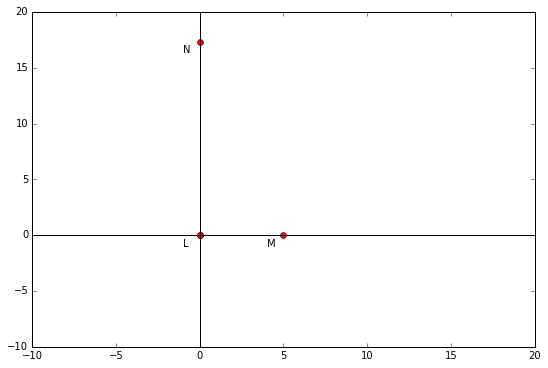

In [116]:
a_LMx = 0
Lx = 0
Ly = 0
Mx = ML*cos(a_LMx)
My = ML*sin(a_LMx)
Nx = NL*cos(a_NLM+a_LMx)
Ny = NL*sin(a_NLM+a_LMx)
npl(Nx,Ny,Lx,Ly,Mx,My,'NLM')

Критерием оценки, как близко расположенны координаты вершин треугольника MNL от вершина тругольника CDE будет сумма расстояний между соответствующими вершинами двух треугольников.  
Не знаю, нужно ли будет находить соответствие между вершинами (при съемке, как я полагаю, как-то фиксируют, какие пункты измерялись).  
Пока что для простоты примем, что E-M,D-L,C-N

$$dist=\sqrt{(Ex-Mx)^2+(Ey-My)^2}+\sqrt{(Dx - Lx)^2+(Dy-Ly)^2)} + \sqrt{(Cx-Nx)^2+(Cy-Ny)^2}$$

In [136]:
dist = sqrt((Ex-Mx)**2+(Ey-My)**2)+sqrt((Dx-Lx)**2+(Dy-Ly)**2) + sqrt((Cx-Nx)**2+(Cy-Ny)**2)
dist

29.999998336009405

Посмотрим, как изменения положения треугольника MNL путем изменения угла a_LMx на rot_angl радиан и координат точки M (My на step_y, Mx на step_x) влияет на сумму расстояний до соответствующих вершин.

In [134]:
rot_angl = 0
step_x = 0
step_y = 0
n_a_LMx = 0+rot_angl
n_Lx = 0+step_x
n_Ly = 0+step_y
n_Mx = ML*cos(a_LMx)+step_x
n_My = ML*sin(a_LMx)+step_y
n_Nx = NL*cos(a_NLM+a_LMx)+step_x
n_Ny = NL*sin(a_NLM+a_LMx)+step_y
n_dist = sqrt((Ex-Mx)**2+(Ey-My)**2)+sqrt((Dx-Lx)**2+(Dy-Ly)**2) + sqrt((Cx-Nx)**2+(Cy-Ny)**2)

In [172]:
calc_n_dist1(0,10,0)


9.99995924944151,18.02779166827356,10,0,15.0,0.0


0.7072591046046561

In [170]:
def calc_n_dist(ML,MN,a_NML,rot_angl, step_x, step_y):
    n_a_LMx = 0+rot_angl
    n_Lx = 0+step_x
    n_Ly = 0+step_y
    n_Mx = ML*cos(a_LMx)+step_x
    n_My = ML*sin(a_LMx)+step_y
    n_Nx = NL*cos(a_NLM+a_LMx)+step_x
    n_Ny = NL*sin(a_NLM+a_LMx)+step_y
    n_Ny = MN*sin(a_NLM+n_a_LMx)+step_y
    print('{},{},{},{},{},{}'.format(n_Nx,n_Ny,n_Lx,n_Ly,n_Mx,n_My))
    return sqrt((Ex-n_Mx)**2+(Ey-n_My)**2)+sqrt((Dx-n_Lx)**2+(Dy-n_Ly)**2) + sqrt((Cx-n_Nx)**2+(Cy-n_Ny)**2)
    

In [192]:
def calc_n_dist1(rot_angl, step_x, step_y):
    n_a_LMx = 10+rot_angl
    n_Lx = 0+step_x
    n_Ly = 0+step_y
    n_Mx = ML*cos(a_LMx)+step_x
    n_My = ML*sin(a_LMx)+step_y
    n_Nx = NL*cos(a_NLM+a_LMx)+step_x
    n_Ny = NL*sin(a_NLM+a_LMx)+step_y
    n_Ny = MN*sin(a_NLM+n_a_LMx)+step_y
    print('{},{},{},{},{},{}'.format(n_Nx,n_Ny,n_Lx,n_Ly,n_Mx,n_My))
    return sqrt((Ex-n_Mx)**2+(Ey-n_My)**2)+sqrt((Dx-n_Lx)**2+(Dy-n_Ly)**2) + sqrt((Cx-n_Nx)**2+(Cy-n_Ny)**2)

def fun1(x):
    return calc_n_dist1(*x)


In [193]:
from scipy.optimize import minimize
x0 = (0,0,0)
res = minimize(fun1, x0, method='SLSQP')
res

-4.07505584904963e-05,-15.12658364655991,0.0,0.0,5.0,0.0
-4.07505584904963e-05,-15.12658364655991,0.0,0.0,5.0,0.0
-4.07505584904963e-05,-15.12658350041625,0.0,0.0,5.0,0.0
-4.0735657329302455e-05,-15.12658364655991,1.4901161193847656e-08,0.0,5.000000014901161,0.0
-4.07505584904963e-05,-15.126583631658749,0.0,1.4901161193847656e-08,5.0,1.4901161193847656e-08
2.294482488577252,16.573918246251147,2.294523239135742,0.9556441307067871,7.294523239135742,0.9556441307067871
2.294482488577252,16.573918246251147,2.294523239135742,0.9556441307067871,7.294523239135742,0.9556441307067871
2.294482488577252,16.573918112082108,2.294523239135742,0.9556441307067871,7.294523239135742,0.9556441307067871
2.294482503478413,16.573918246251147,2.2945232540369034,0.9556441307067871,7.294523254036903,0.9556441307067871
2.294482488577252,16.573918261152308,2.294523239135742,0.9556441456079483,7.294523239135742,0.9556441456079483
5.45763001383382,15.78822647187676,5.457670764392311,0.9031891471408731,10.4576707643

     fun: 2.1614397015633185e-06
     jac: array([ 1.72200896, -0.41039277, -1.10389934,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 186
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([  8.56851693e+00,   9.99999968e+00,  -1.12005643e-07])

В последней итерации выдал координаты:

9.99995850729328,17.320531619154707,9.999999257851771,-4.855179780358599e-07,14.999999257851771,-4.855179780358599e-07

-4.855179780358599e-07 это число, сильно стремящееся к нулю.

Погрешность - стотысясные доли. Вроде норм.

Строим по ним график:

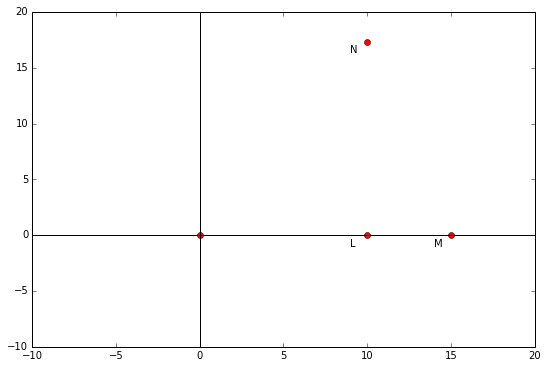

In [194]:
npl(9.999958929853369,17.320533192375912,9.99999968041186,-1.1200564272576671e-07,14.99999968041186,-1.1200564272576671e-07,'NLM')